In [4]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [5]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
warnings.filterwarnings('ignore')


In [6]:
import pandas as pd

# Đọc dữ liệu
df = pd.read_csv('/content/Boston.csv', header='infer', encoding='latin1')
X = df.drop(columns=['medv', 'Unnamed: 0'],)
y = df['medv']

# # Xem 5 dòng đầu của DataFrame
df.head(5)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)
n_var = X_train.shape[1]
print(n_var, '\n', X_train.shape)

13 
 (354, 13)


In [9]:
my_input = Input(shape=(n_var,))
my_output = Dense(units = 1, activation = 'linear')(my_input)

In [10]:
my_model2 = Model(inputs = my_input, outputs = my_output)

In [11]:
my_model2.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14 (56.00 B)

 Trainable params: 14 (56.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
my_optimizer = Adam(learning_rate = 0.002)
my_model2.compile(loss = 'mae', optimizer = my_optimizer, metrics =['mse'])

In [14]:
my_summary = my_model2.fit(X_train, y_train, epochs = 2000, batch_size = 10, validation_split=0.2, verbose = 2)

Epoch 1/2000
29/29 - 2s - 54ms/step - loss: 23.4085 - mse: 637.0925 - val_loss: 23.0919 - val_mse: 604.2173
Epoch 2/2000
29/29 - 0s - 11ms/step - loss: 23.0681 - mse: 622.0811 - val_loss: 22.7534 - val_mse: 589.3102
Epoch 3/2000
29/29 - 0s - 4ms/step - loss: 22.7278 - mse: 607.2034 - val_loss: 22.4144 - val_mse: 574.6204
Epoch 4/2000
29/29 - 0s - 4ms/step - loss: 22.3881 - mse: 592.4529 - val_loss: 22.0763 - val_mse: 560.2101
Epoch 5/2000
29/29 - 0s - 5ms/step - loss: 22.0479 - mse: 578.1492 - val_loss: 21.7363 - val_mse: 545.9785
Epoch 6/2000
29/29 - 0s - 4ms/step - loss: 21.7090 - mse: 563.8791 - val_loss: 21.3987 - val_mse: 532.0605
Epoch 7/2000
29/29 - 0s - 4ms/step - loss: 21.3696 - mse: 550.2787 - val_loss: 21.0629 - val_mse: 518.4412
Epoch 8/2000
29/29 - 0s - 6ms/step - loss: 21.0297 - mse: 536.5148 - val_loss: 20.7241 - val_mse: 504.9647
Epoch 9/2000
29/29 - 0s - 9ms/step - loss: 20.6905 - mse: 523.0396 - val_loss: 20.3853 - val_mse: 491.7259
Epoch 10/2000
29/29 - 0s - 6ms/step

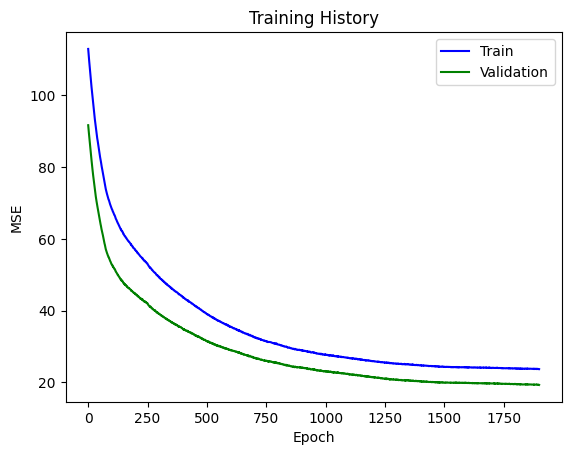

In [15]:
import matplotlib.pyplot as plt

# Bỏ qua n_skip bước đầu tiên để biểu đồ rõ ràng hơn (nếu có các giá trị lớn lúc khởi đầu)
n_skip = 100

# Vẽ biểu đồ MSE của tập huấn luyện
plt.plot(my_summary.history['mse'][n_skip:], c="b")

# Vẽ biểu đồ MSE của tập validation
plt.plot(my_summary.history['val_mse'][n_skip:], c="g")

# Đặt tiêu đề cho biểu đồ
plt.title('Training History')

# Đặt nhãn cho trục y
plt.ylabel('MSE')

# Đặt nhãn cho trục x
plt.xlabel('Epoch')

# Hiển thị chú giải (legend) để phân biệt đường Train và Validation
plt.legend(['Train', 'Validation'], loc='upper right')

# Hiển thị biểu đồ
plt.show()

In [16]:
MSE = my_model2.evaluate(X_test, y_test, verbose = 2)[1]
RMSE = np.sqrt(MSE)
print(RMSE)


5/5 - 0s - 47ms/step - loss: 3.5546 - mse: 31.8217
5.641069981149548


In [17]:
import os
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

In [18]:
data_raw = load_iris()
X = data_raw['data']
y0 = data_raw['target'].reshape(-1, 1)

In [19]:
import tensorflow as tf

In [20]:
y = tf.keras.utils.to_categorical(y0, num_classes = 3)

In [21]:
import pandas as pd
import numpy as np

# Giả định X và y đã được định nghĩa từ trước, ví dụ từ load_iris()
# X, y = load_iris(return_X_y=True) # Chỉ là ví dụ nếu bạn chưa định nghĩa X, y

header = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species_0', 'Species_1', 'Species_2']
df = pd.DataFrame(np.concatenate([X,y],axis=1),columns=header)
df.head(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species_0,Species_1,Species_2
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0


In [22]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)
n_var = X_train.shape[1]

In [25]:
my_model = Sequential()
my_model.add(Dense(input_dim = n_var, units = 3, activation='softmax'))

In [26]:
my_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
n_epochs = 500
batch_sizes = 10
learn_rate = 0.005

In [34]:
my_optimizer = Adam(learning_rate = learn_rate)
my_model.compile(loss='categorical_crossentropy', optimizer=my_optimizer, metrics = ['accuracy'])

In [35]:
my_summary = my_model.fit(X_train, y_train, epochs=n_epochs, batch_size= batch_sizes, validation_split=0.2, verbose=2)

Epoch 1/500
9/9 - 2s - 211ms/step - accuracy: 0.3810 - loss: 1.1578 - val_accuracy: 0.3810 - val_loss: 1.1639
Epoch 2/500
9/9 - 1s - 134ms/step - accuracy: 0.3810 - loss: 1.1300 - val_accuracy: 0.3810 - val_loss: 1.1304
Epoch 3/500
9/9 - 0s - 15ms/step - accuracy: 0.3810 - loss: 1.1061 - val_accuracy: 0.3810 - val_loss: 1.0991
Epoch 4/500
9/9 - 0s - 9ms/step - accuracy: 0.3810 - loss: 1.0834 - val_accuracy: 0.3810 - val_loss: 1.0716
Epoch 5/500
9/9 - 0s - 16ms/step - accuracy: 0.3810 - loss: 1.0637 - val_accuracy: 0.3810 - val_loss: 1.0482
Epoch 6/500
9/9 - 0s - 23ms/step - accuracy: 0.3929 - loss: 1.0447 - val_accuracy: 0.3810 - val_loss: 1.0313
Epoch 7/500
9/9 - 0s - 32ms/step - accuracy: 0.4405 - loss: 1.0259 - val_accuracy: 0.4286 - val_loss: 1.0112
Epoch 8/500
9/9 - 0s - 34ms/step - accuracy: 0.4643 - loss: 1.0082 - val_accuracy: 0.4286 - val_loss: 0.9938
Epoch 9/500
9/9 - 0s - 17ms/step - accuracy: 0.4881 - loss: 0.9916 - val_accuracy: 0.4762 - val_loss: 0.9786
Epoch 10/500
9/9 -

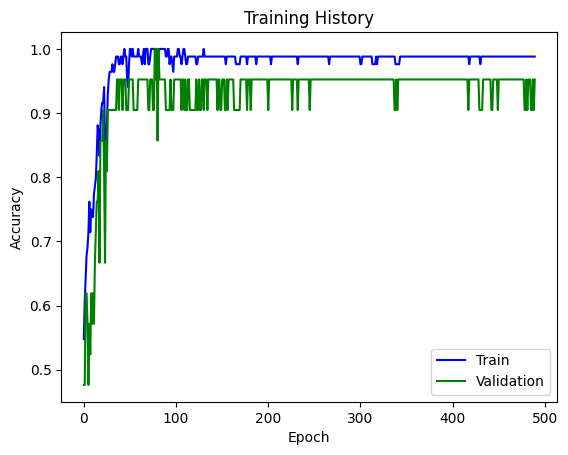

In [36]:
import matplotlib.pyplot as plt

# Bỏ qua n_skip bước đầu tiên để biểu đồ rõ ràng hơn (nếu có các giá trị biến động mạnh lúc khởi đầu)
n_skip = 10

# Vẽ biểu đồ Accuracy của tập huấn luyện
plt.plot(my_summary.history['accuracy'][n_skip:], c="b")

# Vẽ biểu đồ Accuracy của tập validation
plt.plot(my_summary.history['val_accuracy'][n_skip:], c="g")

# Đặt tiêu đề cho biểu đồ
plt.title('Training History')

# Đặt nhãn cho trục y
plt.ylabel('Accuracy')

# Đặt nhãn cho trục x
plt.xlabel('Epoch')

# Hiển thị chú giải (legend) để phân biệt đường Train và Validation
plt.legend(['Train', 'Validation'], loc='lower right') # Lưu ý: loc là 'lower right'

# Hiển thị biểu đồ
plt.show()